<a href="https://colab.research.google.com/github/Sandra-Su91/bigdata/blob/main/0330%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
ls



function (name, pos = -1L, envir = as.environment(pos), all.names = FALSE, 
    pattern, sorted = TRUE) 
{
    if (!missing(name)) {
        pos <- tryCatch(name, error = function(e) e)
        if (inherits(pos, "error")) {
            name <- substitute(name)
            if (!is.character(name)) 
                name <- deparse(name)
            warning(gettextf("%s converted to character string", 
                sQuote(name)), domain = NA)
            pos <- name
        }
    }
    all.names <- .Internal(ls(envir, all.names, sorted))
    if (!missing(pattern)) {
        if ((ll <- length(grep("[", pattern, fixed = TRUE))) && 
            ll != length(grep("]", pattern, fixed = TRUE))) {
            if (pattern == "[") {
                pattern <- "\\["
                warning("replaced regular expression pattern '[' by  '\\\\['")
            }
            else if (length(grep("[^\\\\]\\[<-", pattern))) {
                pattern <- sub("\\[<-", "\\\\\\[<-", pattern)
                warning("replaced '[<-' by '\\\\[<-' in regular expression pattern")
            }
        }
        grep(pattern, all.names, value = TRUE)
    }
    else all.names
}
<bytecode: 0x5584c7ca27e8>
<environment: namespace:base>

In [2]:
install.packages("rjava")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rjava’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘rJava’ ?”


In [3]:
install.packages("jiebaR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘jiebaRD’




In [4]:
install.packages("tmcn")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
install.packages("lubridata")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘lubridata’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [7]:
install.packages("stringr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
install.packages("wordcloud")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
install.packages("Pwordseg",repos = "http://R-Forge.R-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘Pwordseg’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [10]:
library(dplyr)
library(lubridate)
library(stringr)
library(jiebaR)
library(wordcloud)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: jiebaRD

Loading required package: RColorBrewer



In [11]:
content <- "長榮海運巨型貨輪長賜輪（Ever Given）在蘇伊士運河（Suez Canal）擱淺近一週，今天終於重新浮起脫困，運河恢復開放。當局表示可能會花2天半至3天時間，讓等待通過的船舶長龍淨空。
法新社報導，蘇伊士運河管理局（SCA）發布聲明表示，管理局主席雷比（Osama Rabie）已宣布蘇伊士運河航運恢復。

長榮晚間也發布新聞稿指出，接獲長賜輪船東通報，這艘租船已於台北時間今天晚間9點左右、埃及時間下午3時重新浮起，並在拖船協助下，順利移出原先擱淺的河道，讓蘇伊士運河恢復正常通行。

長榮表示，長賜輪將先移至蘇伊士運河大苦湖（Great Bitter Lake）水域錨地，進行船舶適航性檢驗，這艘貨櫃輪後續的航程以及貨物運送，將視驗船機構的檢驗結果，進行必要調整與安排。

根據路透社，雷比表示，當局可能會花2天半至3天時間紓解塞船。一名消息人士也說，每天可有超過100艘船隻進入運河。

全球航運權威媒體「勞氏日報」（Lloyd's List）稍早報導，現有425艘船舶正等著通過蘇伊士運河。

400公尺長的長賜輪為2萬TEU級貨櫃輪，現由長榮海運以論時傭船（Time Charter）方式向日本船東承租，目前配置於遠東至歐洲航線。

長賜輪在巴拿馬註冊，本月23日在強烈沙塵暴中擱淺於蘇伊士運河，船身打斜堵住運河雙向交通，使得全球供應鏈受阻，受影響的每日貨物運輸規模達90億美元（約新台幣2600億元）。

以下為輪船今天脫困過程整理：

●成功浮起
長賜輪在蘇伊士運河受困，各方紛紛趕來救援。

掛荷蘭旗的專業拖曳船Alp Guard號、掛義大利旗的Carlo Magno號28日陸續抵達事發現場附近。這兩艘拖曳船和已在現場的至少10艘拖曳船，今天以拖引配合挖泥船的挖沙作業，協助讓長賜輪脫困。

根據海上服務供應商Inchcape Shipping Service的電子郵件，長賜輪在埃及當地時間今天凌晨4時30分左右（台灣時間29日上午10時30分）成功浮起。

雷比隨後透過聲明表示：「這艘船的方向已被重新導正80%。船尾移動至距離岸邊102公尺處。」長賜輪船尾位置原先距離河岸僅4公尺。"

In [12]:
cutter<-worker(bylines = F)

In [13]:
cutter[content]

[1] "長榮"       "海運"       "巨型"       "貨輪"       "長"        
  [6] "賜輪"       "Ever"       "Given"      "在"         "蘇伊士運河"
 [11] "Suez"       "Canal"      "擱淺"       "近"         "一週"      
 [16] "今天"       "終於"       "重新"       "浮起"       "脫困"      
 [21] "運河"       "恢復"       "開放"       "當局"       "表示"      
 [26] "可能"       "會花"       "2"          "天半至"     "3"         
 [31] "天"         "時間"       "讓"         "等待"       "通過"      
 [36] "的"         "船舶"       "長龍"       "淨空"       "法新社"    
 [41] "報導"       "蘇伊士運河" "管理局"     "SCA"        "發"        
 [46] "布"         "聲明"       "表示"       "管理局"     "主席"      
 [51] "雷比"       "Osama"      "Rabie"      "已"         "宣布"      
 [56] "蘇伊士運河" "航運"       "恢復"       "長榮"       "晚間"      
 [61] "也"         "發布"       "新聞稿"     "指出"       "接獲"      
 [66] "長"         "賜"         "輪"         "船東"       "通報"      
 [71] "這艘"       "租船"       "已於"       "台北"       "時間"      
 [76] "今天"       "晚間"       "9"          "點"         "左右"      
 [81] "埃及"       "時間"       "下午"       "3"          "時"        
 [86] "重新"       "浮起"       "並在"       "拖船"       "協助"      
 [91] "下"         "順利"       "移出"       "原先"       "擱淺"      
 [96] "的"         "河道"       "讓"         "蘇伊士運河" "恢復正常"  
[101] "通行"       "長榮"       "表示"       "長"         "賜"        
[106] "輪"         "將先"       "移至"       "蘇伊士運河" "大苦湖"    
[111] "Great"      "Bitter"     "Lake"       "水域"       "錨地"      
[116] "進行"       "船舶"       "適航性"     "檢驗"       "這艘"      
[121] "貨櫃"       "輪"         "後續"       "的"         "航程"      
[126] "以及"       "貨物"       "運送"       "將視驗"     "船"        
[131] "機構"       "的"         "檢驗"       "結果"       "進行"      
[136] "必要"       "調整"       "與"         "安排"       "根據"      
[141] "路透社"     "雷比"       "表示"       "當局"       "可能"      
[146] "會花"       "2"          "天半至"     "3"          "天"        
[151] "時間"       "紓解"       "塞船"       "一名"       "消息人士"  
[156] "也"         "說"         "每天"       "可有"       "超過"      
[161] "100"        "艘"         "船隻"       "進入"       "運河"      
[166] "全球"       "航運"       "權威"       "媒體"       "勞"        
[171] "氏"         "日報"       "Lloyd"      "s"          "List"      
[176] "稍早"       "報導"       "現有"       "425"        "艘"        
[181] "船舶"       "正"         "等"         "著"         "通過"      
[186] "蘇伊士運河" "400"        "公尺"       "長"         "的"        
[191] "長"         "賜"         "輪"         "為"         "2"         
[196] "萬"         "TEU"        "級"         "貨櫃"       "輪"        
[201] "現由"       "長榮"       "海運"       "以論"       "時傭船"    
[206] "Time"       "Charter"    "方式"       "向"         "日本"      
[211] "船東"       "承租"       "目前"       "配"         "置於"      
[216] "遠東"       "至"         "歐洲"       "航線"       "長"        
[221] "賜"         "輪"         "在"         "巴拿馬"     "註冊"      
[226] "本月"       "23"         "日"         "在"         "強烈"      
[231] "沙塵暴"     "中"         "擱淺"       "於"         "蘇伊士運河"
[236] "船身"       "打斜"       "堵住"       "運河"       "雙向交通"  
[241] "使得"       "全球"       "供應鏈"     "受阻"       "受"        
[246] "影響"       "的"         "每日"       "貨物運輸"   "規模"      
[251] "達"         "90"         "億美元"     "約"         "新"        
[256] "台"         "幣"         "2600"       "億元"       "以下"      
[261] "為"         "輪船"       "今天"       "脫困"       "過程"      
[266] "整理"       "成功"       "浮起"       "長"         "賜"        
[271] "輪"         "在"         "蘇伊士運河" "受困"       "各方"      
[276] "紛紛"       "趕來"       "救援"       "掛"         "荷蘭"      
[281] "旗"         "的"         "專業"       "拖曳"       "船"        
[286] "Alp"        "Guard"      "號"         "掛"         "義大利"    
[291] "旗"         "的"         "Carlo"      "Magno"      "號"        
[296] "28"         "日"         "陸續"       "抵達"       "事發"      
[301] "現場"       "附近"       "這"         "兩艘"       "拖曳"      
[306] "船"         "和"         "已"         "在"         "現場"      
[311] "的"         "至少"       "10"         "艘"         "拖曳"      
[316] "船"         "今天"       "以"         "拖引"       

In [14]:
new_words<-c("蘇伊士運河","醫療體系","防疫措施")
for(i in 1:length(new_words)){new_user_word(cutter, new_words[i])}

In [15]:
content <- str_remove_all(content,"[0-9a-zA-Z]+?")
cutter[content]

[1] "長榮"       "海運"       "巨型"       "貨輪"       "長"        
  [6] "賜輪"       "在"         "蘇伊士運河" "擱淺"       "近"        
 [11] "一週"       "今天"       "終於"       "重新"       "浮起"      
 [16] "脫困"       "運河"       "恢復"       "開放"       "當局"      
 [21] "表示"       "可能"       "會花"       "天半至"     "天"        
 [26] "時間"       "讓"         "等待"       "通過"       "的"        
 [31] "船舶"       "長龍"       "淨空"       "法新社"     "報導"      
 [36] "蘇伊士運河" "管理局"     "發"         "布"         "聲明"      
 [41] "表示"       "管理局"     "主席"       "雷比"       "已"        
 [46] "宣布"       "蘇伊士運河" "航運"       "恢復"       "長榮"      
 [51] "晚間"       "也"         "發布"       "新聞稿"     "指出"      
 [56] "接獲"       "長"         "賜"         "輪"         "船東"      
 [61] "通報"       "這艘"       "租船"       "已於"       "台北"      
 [66] "時間"       "今天"       "晚間"       "點"         "左右"      
 [71] "埃及"       "時間"       "下"         "午時"       "重新"      
 [76] "浮起"       "並在"       "拖船"       "協助"       "下"        
 [81] "順利"       "移出"       "原先"       "擱淺"       "的"        
 [86] "河道"       "讓"         "蘇伊士運河" "恢復正常"   "通行"      
 [91] "長榮"       "表示"       "長"         "賜"         "輪"        
 [96] "將先"       "移至"       "蘇伊士運河" "大苦湖"     "水域"      
[101] "錨地"       "進行"       "船舶"       "適航性"     "檢驗"      
[106] "這艘"       "貨櫃"       "輪"         "後續"       "的"        
[111] "航程"       "以及"       "貨物"       "運送"       "將視驗"    
[116] "船"         "機構"       "的"         "檢驗"       "結果"      
[121] "進行"       "必要"       "調整"       "與"         "安排"      
[126] "根據"       "路透社"     "雷比"       "表示"       "當局"      
[131] "可能"       "會花"       "天半至"     "天"         "時間"      
[136] "紓解"       "塞船"       "一名"       "消息人士"   "也"        
[141] "說"         "每天"       "可有"       "超過"       "艘"        
[146] "船隻"       "進入"       "運河"       "全球"       "航運"      
[151] "權威"       "媒體"       "勞"         "氏"         "日報"      
[156] "稍早"       "報導"       "現有"       "艘"         "船舶"      
[161] "正"         "等"         "著"         "通過"       "蘇伊士運河"
[166] "公尺"       "長"         "的"         "長"         "賜"        
[171] "輪"         "為"         "萬級"       "貨櫃"       "輪"        
[176] "現由"       "長榮"       "海運"       "以論"       "時傭船"    
[181] "方式"       "向"         "日本"       "船東"       "承租"      
[186] "目前"       "配"         "置於"       "遠東"       "至"        
[191] "歐洲"       "航線"       "長"         "賜"         "輪"        
[196] "在"         "巴拿馬"     "註冊"       "本月"       "日"        
[201] "在"         "強烈"       "沙塵暴"     "中"         "擱淺"      
[206] "於"         "蘇伊士運河" "船身"       "打斜"       "堵住"      
[211] "運河"       "雙向交通"   "使得"       "全球"       "供應鏈"    
[216] "受阻"       "受"         "影響"       "的"         "每日"      
[221] "貨物運輸"   "規模"       "達"         "億美元"     "約"        
[226] "新"         "台"         "幣"         "億元"       "以下"      
[231] "為"         "輪船"       "今天"       "脫困"       "過程"      
[236] "整理"       "成功"       "浮起"       "長"         "賜"        
[241] "輪"         "在"         "蘇伊士運河" "受困"       "各方"      
[246] "紛紛"       "趕來"       "救援"       "掛"         "荷蘭"      
[251] "旗"         "的"         "專業"       "拖曳"       "船"        
[256] "號"         "掛"         "義大利"     "旗"         "的"        
[261] "號日"       "陸續"       "抵達"       "事發"       "現場"      
[266] "附近"       "這"         "兩艘"       "拖曳"       "船"        
[271] "和"         "已"         "在"         "現場"       "的"        
[276] "至少"       "艘"         "拖曳"       "船"         "今天"      
[281] "以"         "拖引"       "配合"       "挖泥船"     "的"        
[286] "挖沙"       "作業"       "協助"       "讓"         "長"        
[291] "賜"         "輪"         "脫困"       "根據"       "海上"      
[296] "服務供應商" "的"         "電子郵件"   "長"         "賜"        
[301] "輪"         "在"         "埃及"       "當地"       "時間"      
[306] "今天"       "凌晨時分"   "左右"       "台"         "灣"        
[311] "時間"       "日"         "上午"       "時分"       "成功"      
[316] "浮起"       "雷比"       "隨後"       "透過"       "聲明"      
[321] "表示"       "這"         "艘"         "船"         "的"  

In [37]:
new_words<-c("長榮海運","巨型貨輪","長賜輪","近一周","發布","下午","新台幣","防疫措施")
writeLines(new_words, "new_words.txt")

In [38]:
stop_words<-c("已","的","也","與","讓","說","中","以","為","在")
writeLines(stop_words,"stop_words.txt")

In [39]:
cutter<-worker(user = "new_words.txt",stop_word = "stop_words.txt",bylines=FALSE)
seg_words<-cutter[content]
seg_words

[1] "長榮海運"   "巨型貨輪"   "長賜輪"     "蘇伊士運河" "擱淺"      
  [6] "近"         "一週"       "今天"       "終於"       "重新"      
 [11] "浮起"       "脫困"       "運河"       "恢復"       "開放"      
 [16] "當局"       "表示"       "可能"       "會花"       "天半至"    
 [21] "天"         "時間"       "等待"       "通過"       "船舶"      
 [26] "長龍"       "淨空"       "法新社"     "報導"       "蘇伊士運河"
 [31] "管理局"     "發布"       "聲明"       "表示"       "管理局"    
 [36] "主席"       "雷比"       "宣布"       "蘇伊士運河" "航運"      
 [41] "恢復"       "長榮"       "晚間"       "發布"       "新聞稿"    
 [46] "指出"       "接獲"       "長賜輪"     "船東"       "通報"      
 [51] "這艘"       "租船"       "已於"       "台北"       "時間"      
 [56] "今天"       "晚間"       "點"         "左右"       "埃及"      
 [61] "時間"       "下"         "午時"       "重新"       "浮起"      
 [66] "並在"       "拖船"       "協助"       "下"         "順利"      
 [71] "移出"       "原先"       "擱淺"       "河道"       "蘇伊士運河"
 [76] "恢復正常"   "通行"       "長榮"       "表示"       "長賜輪"    
 [81] "將先"       "移至"       "蘇伊士運河" "大苦湖"     "水域"      
 [86] "錨地"       "進行"       "船舶"       "適航性"     "檢驗"      
 [91] "這艘"       "貨櫃"       "輪"         "後續"       "航程"      
 [96] "以及"       "貨物"       "運送"       "將視驗"     "船"        
[101] "機構"       "檢驗"       "結果"       "進行"       "必要"      
[106] "調整"       "安排"       "根據"       "路透社"     "雷比"      
[111] "表示"       "當局"       "可能"       "會花"       "天半至"    
[116] "天"         "時間"       "紓解"       "塞船"       "一名"      
[121] "消息人士"   "每天"       "可有"       "超過"       "艘"        
[126] "船隻"       "進入"       "運河"       "全球"       "航運"      
[131] "權威"       "媒體"       "勞"         "氏"         "日報"      
[136] "稍早"       "報導"       "現有"       "艘"         "船舶"      
[141] "正"         "等"         "著"         "通過"       "蘇伊士運河"
[146] "公尺"       "長"         "長賜輪"     "萬級"       "貨櫃"      
[151] "輪"         "現由"       "長榮海運"   "以論"       "時傭船"    
[156] "方式"       "向"         "日本"       "船東"       "承租"      
[161] "目前"       "配"         "置於"       "遠東"       "至"        
[166] "歐洲"       "航線"       "長賜輪"     "巴拿馬"     "註冊"      
[171] "本月"       "日"         "強烈"       "沙塵暴"     "擱淺"      
[176] "於"         "蘇伊士運河" "船身"       "打斜"       "堵住"      
[181] "運河"       "雙向交通"   "使得"       "全球"       "供應鏈"    
[186] "受阻"       "受"         "影響"       "每日"       "貨物運輸"  
[191] "規模"       "達"         "億美元"     "約"         "新台幣"    
[196] "億元"       "以下"       "輪船"       "今天"       "脫困"      
[201] "過程"       "整理"       "成功"       "浮起"       "長賜輪"    
[206] "蘇伊士運河" "受困"       "各方"       "紛紛"       "趕來"      
[211] "救援"       "掛"         "荷蘭"       "旗"         "專業"      
[216] "拖曳"       "船"         "號"         "掛"         "義大利"    
[221] "旗"         "號日"       "陸續"       "抵達"       "事發"      
[226] "現場"       "附近"       "這"         "兩艘"       "拖曳"      
[231] "船"         "和"         "現場"       "至少"       "艘"        
[236] "拖曳"       "船"         "今天"       "拖引"       "配合"      
[241] "挖泥船"     "挖沙"       "作業"       "協助"       "長賜輪"    
[246] "脫困"       "根據"       "海上"       "服務供應商" "電子郵件"  
[251] "長賜輪"     "埃及"       "當地"       "時間"       "今天"      
[256] "凌晨時分"   "左右"       "台"         "灣"         "時間"      
[261] "日"         "上午"       "時分"       "成功"       "浮起"      
[266] "雷比"       "隨後"       "透過"       "聲明"       "表示"      
[271] "這"         "艘"         "船"         "方向"       "被"        
[276] "重新"       "導正"       "船尾"       "移動"       "至"        
[281] "距離"       "岸邊"       "公尺"       "處"         "長賜輪"    
[286] "船尾"       "位置"       "原先"       "距離"       "河岸"      
[291] "僅"         "公尺"

In [40]:
txt_freq<-freq(seg_words)
txt_freq<-arrange(txt_freq,desc(freq))
head(txt_freq)

,char,freq
,<chr>,<dbl>
1,長賜輪,9
2,蘇伊士運河,8
3,時間,6
4,今天,5
5,表示,5
6,船,5


Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in strheight(words[i], cex = size[i], ...):
“font family 'Microsoft YaHei' not found, will use 'sans' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in text.default(x1, y1, words[i], cex = siz

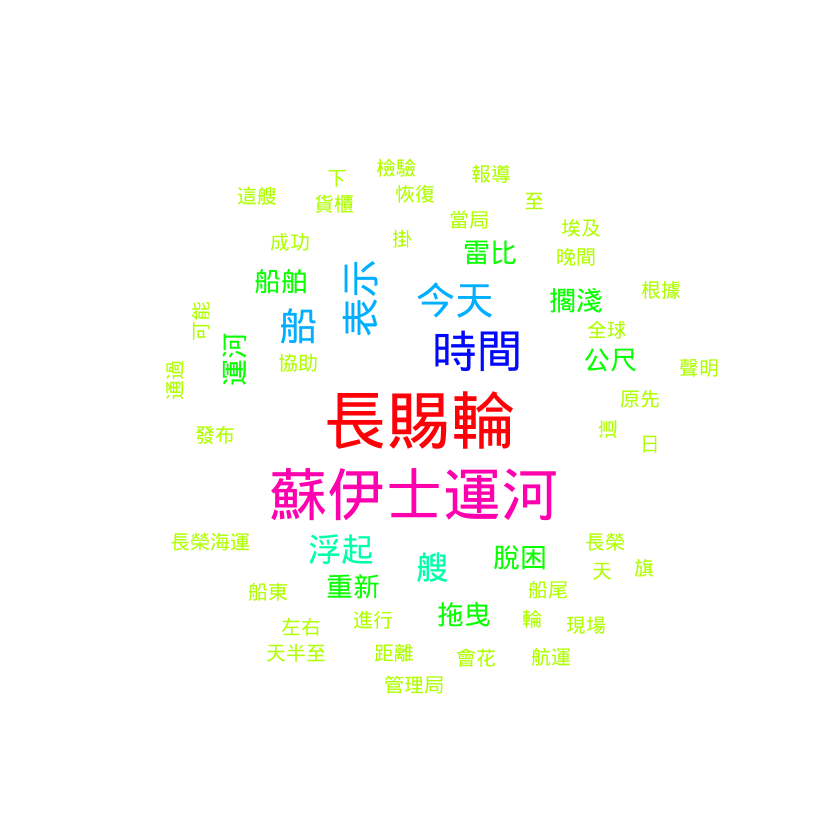

In [41]:
par(family=("Microsoft YaHei"))
wordcloud(txt_freq$char,txt_freq$freq,min.freq =2,
random.order=F,ordered.colors = F,colors = rainbow(nrow(txt_freq)))

In [21]:
install.packages("showtext")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’




In [22]:
library(showtext)

Loading required package: sysfonts

Loading required package: showtextdb



In [23]:
showtext.auto(enable=TRUE)

'showtext.auto()' is now renamed to 'showtext_auto()'
The old version still works, but consider using the new function in future code

